In [14]:
import pandas as pd
import numpy as np

In [305]:
emp_csv = pd.read_csv('empty_data.csv', header=0, sep=';')
al_csv = pd.read_csv('al_data.csv', header=0, sep=';')
fe_csv = pd.read_csv('fe_data.csv', header=0, sep=';')    

emp1 = np.array(emp_csv)
al1 = np.array(al_csv)
fe1 = np.array(fe_csv)

def str_to_seconds(t):
    if type(t) is not int:
        m, s = map(int, t.split(':'))
        return 60 * m + s
    else:
        return t

def convert1(a):
    for i in range(len(a)):
        #if type(a[i][0]) is not float:
        #    a[i][0] = float(a[i][0].replace(',', '.'))
        a[i, 0] = 0.1
        a[i, 1] = str_to_seconds(a[i][1])
        
convert1(emp1)
convert1(al1)
convert1(fe1)

emp2 = emp1.copy()
al2 = al1.copy()
fe2 = fe1.copy()

emp1 = np.transpose(emp1)
al1 = np.transpose(al1)
fe1 = np.transpose(fe1)

emp_data = []
al_data = []
fe_data = []

emp_data.append(emp1)
al_data.append(al1)
fe_data.append(fe1)

print('1\nEmpty\n----\n', emp1)
print('----\nAl\n----\n', al1)
print('----\nFe\n----\n', fe1)

emp_dr = emp1[0]
emp_dt = emp1[1]
al_dr = al1[0]
al_dt = al1[1]
fe_dr = fe1[0]
fe_dt = fe1[1]

r = 0

def convert2(a):
    a[0, 0] += r
    for i in range(1, len(a)):
        a[i, 0] += a[i-1, 0]
        a[i, 1] += a[i-1, 1]

convert2(emp2)
convert2(al2)
convert2(fe2)

emp2 = np.transpose(emp2)
al2 = np.transpose(al2)
fe2 = np.transpose(fe2)

emp2[0] = [round(i, 3) for i in emp2[0]]
al2[0] = [round(i, 3)for i in al2[0]]
fe2[0] = [round(i, 3)for i in fe2[0]]

emp_data.append(emp2)
al_data.append(al2)
fe_data.append(fe2)

emp_r = emp2[0]
emp_t = emp2[1]
al_r = al2[0]
al_t = al2[1]
fe_r = fe2[0]
fe_t = fe2[1]

print('\n2\nEmpty\n----\n', emp2)
print('----\nAl\n----\n', al2)
print('----\nFe\n----\n', fe2)

1
Empty
----
 [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [76 86 93 105 107 117 121 123 136 142 154 156 165 180]]
----
Al
----
 [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [159 128 137 150 164 154 178 181]]
----
Fe
----
 [[0.1 0.1 0.1 0.1 0.1 0.1]
 [111 133 144 149 161 164]]

2
Empty
----
 [[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4]
 [76 162 255 360 467 584 705 828 964 1106 1260 1416 1581 1761]]
----
Al
----
 [[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
 [159 287 424 574 738 892 1070 1251]]
----
Fe
----
 [[0.1 0.2 0.3 0.4 0.5 0.6]
 [111 244 388 537 698 862]]


In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

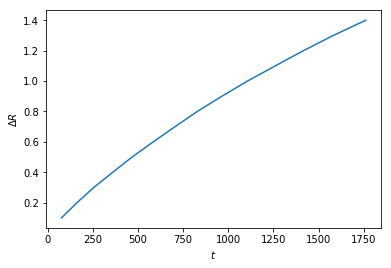

In [319]:
plt.plot(emp_t, emp_r)
plt.xlabel('$t$')
plt.ylabel('$\Delta R$')
plt.show()

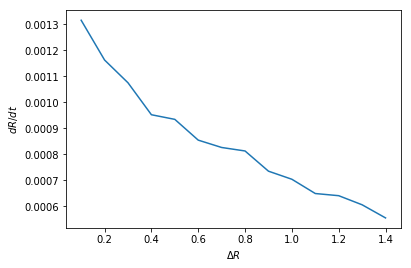

In [320]:
plt.plot(emp_r, emp_dr / emp_dt)
plt.xlabel('$\Delta R$')
plt.ylabel('$dR/dt$')
plt.show()

[0.00157, -0.00298, 0.00513, -0.00432, 0.00131]
0.0015666997280138816


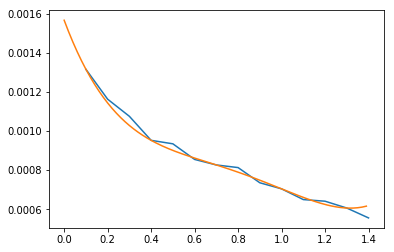

In [333]:
def approx(a, b, step): 
    x = [i for i in a[::step]]
    y = [i for i in b[::step]]
    n = len(x)
    x = np.array([[i ** j for j in range(n)] for i in x])
    return linalg.solve(x, y)

a = approx(emp_r, emp_dr / emp_dt, 3)

def f(x):
    n = len(a)
    s = 0.
    for i in range(n):
        s += a[i] * x ** i
    return s

x = np.arange(0, 1.4, 0.01)
y = [f(i) for i in x]

plt.plot(emp_r, emp_dr / emp_dt)
plt.plot(x, y)

print([round(i, 5) for i in a])
drdt0 = f(r)
print(drdt0)

Аппроксимация $\frac{dR}{dt} = f(R)$ в окрестности $R_K$

$$ f(x) \approx 0,0016 - 0,003x + 0,0051x^2 - 0,0043x^3 + 0,0013x^4 $$

$$ f(R_K) \approx 0,0016 $$

$$ C = \frac{PR\alpha}{\left(\frac{dR}{dt}\right)_{T_\text{к}}(1 + \alpha\Delta T_\text{к})} $$ 

In [332]:
tk = 22.
p0 = 10
rk = 18.044
alpha = 4.28e-3

c0 = (p0 * rk * alpha) / (drdt0 * (1. + alpha * tk))
print(c0)

450.51575727059486


Считаем в СИ (!)

$$
C_0 \approx 450,5 \hspace{5pt} \frac{\text{Вт}\cdot\text{Ом}\cdot\text{К}^{-1}}{\frac{\text{Ом}}{\text{с}}} = 
450,5 \hspace{5pt} \frac{\text{Вт}\cdot\text{с}}{\text{К}} =
450,5 \hspace{5pt} \frac{\text{Дж}}{\text{К}}.
$$

Теперь те же опыты для алюминия

[0.00093, -0.00084, 0.00045]
0.0009315699126092384


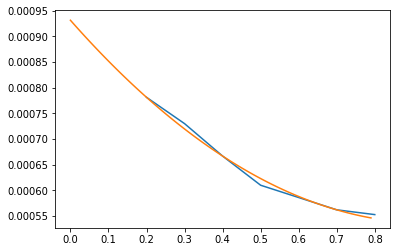

In [334]:
al_r1 = [al_r[i] for i in range(1, len(al_r))]
al_dr1 = [al_dr[i] for i in range(1, len(al_dr))]
al_dt1 = [al_dt[i] for i in range(1, len(al_dt))]

al_r1.pop(4)
al_dr1.pop(4)
al_dt1.pop(4)

al_r1 = np.array(al_r1) 
al_dr1 = np.array(al_dr1) 
al_dt1 = np.array(al_dt1) 

a = approx(al_r1, al_dr1 / al_dt1, 2)

x = np.arange(0, 0.8, 0.01)
y = [f(i) for i in x]

plt.plot(al_r1, al_dr1 / al_dt1)
plt.plot(x, y)

print([round(i, 5) for i in a])
al_drdt0 = f(r)
print(al_drdt0)

$$ f(x) \approx 0,00093 - 0,00084x + 0,00045x^2 $$

$$ f(R_K) \approx 9,3 \cdot 10^{-4} $$

In [331]:
m_al = 0.2947
mm_al = 27 / 1000
c_al = (p0 * rk * alpha) / (al_drdt0 * (1. + alpha * tk))
print(c_al - c0)
print((c_al - c0) / m_al)
print((c_al - c0) / (m_al / mm_al))

307.15460630401464
1042.2619827078881
28.141073533112976


$$
C_{\text{Al}} \approx 307,1 \hspace{5pt} \frac{\text{Дж}}{\text{К}}.
$$

$$
C_{\text{Al}}^\text{уд} \approx 1042,3 \hspace{5pt} \frac{\text{Дж}}{\text{К}\cdot\text{кг}}.
$$

$$
C_{\text{Al}}^\nu \approx 28,1 \hspace{5pt} \frac{\text{Дж}}{\text{К}\cdot\text{моль}}.
$$

И для железа

[0.001, -0.002, 0.002]
0.0010540528882920187


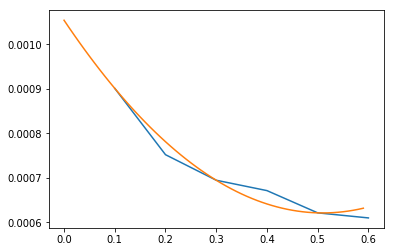

In [329]:
a = approx(fe_r, fe_dr / fe_dt, 2)

x = np.arange(0, 0.6, 0.01)
y = [f(i) for i in x]

plt.plot(fe_r, fe_dr / fe_dt)
plt.plot(x, y)

print([round(i, 3) for i in a])
fe_drdt0 = f(r)
print(fe_drdt0)

$$ f(x) \approx 0,001 - 0,002x + 0,002x^2 $$

$$ f(R_K) \approx 0,001 $$

In [335]:
m_fe = 0.8165
mm_fe = 56 / 1000
c_fe = (p0 * rk * alpha) / (fe_drdt0 * (1. + alpha * tk))
print(c_fe - c0)
print((c_fe - c0) / m_fe)
print((c_fe - c0) / (m_fe / mm_fe))

219.1118508141572
268.35499181158264
15.027879541448627


$$
C_{\text{Fe}} \approx 219,1 \hspace{5pt} \frac{\text{Дж}}{\text{К}}.
$$

$$
C_{\text{Fe}}^\text{уд} \approx 268,4 \hspace{5pt} \frac{\text{Дж}}{\text{К}\cdot\text{кг}}.
$$

$$
C_{\text{Fe}}^\nu \approx 15,0 \hspace{5pt} \frac{\text{Дж}}{\text{К}\cdot\text{моль}}.
$$